### 置信区间 - 第一部分

首先让我们导入必要的库和数据集。你还可以获得完整版本的数据和简化版本的数据。简化版本就是你实际使用的一个例子，它只是样本；而完整版本的数据是人口数据中每个个体的实例。

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` 样本中喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

`2.` 在喝咖啡的人中，他们的平均身高是多少？在不喝咖啡的人中，他们的平均身高是多少？

`3.` 模拟来自200个原始样本的200个“新”个体。在该有放回抽样样本（bootstrap sample）中，喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

`4.` 现在模拟10,000次有放回抽样，并取每个样本中不喝咖啡的人的平均身高。每个有放回抽样样本应该是从200个数据点中取出的第一个样本。绘制分布图，并拉出95％置信区间所需的值。在这个例子中，关于平均数的抽样分布，你发现了什么？

`5.`  你的区间是否记录了人群中不喝咖啡的人的实际平均身高？看一看人口中的平均数和95％置信区间提供的两个界限，然后回答下面的最后一个测试题目。

In [4]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


1. 样本中喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

In [5]:
(coffee_red['drinks_coffee']==True).mean()

0.595

In [6]:
(coffee_red['drinks_coffee']== False).mean()

0.405

2. 在喝咖啡的人中，他们的平均身高是多少？在不喝咖啡的人中，他们的平均身高是多少？

In [7]:
coffee_red.query('drinks_coffee==True').height.mean()

68.11962990858618

In [9]:
coffee_red[coffee_red['drinks_coffee']==False].height.mean()

66.78492279927877

3. 模拟来自200个原始样本的200个“新”个体。在该有放回抽样样本（bootstrap sample）中，喝咖啡的人的比例是多少？不喝咖啡的人的比例是多少？

In [13]:
bootstrap = coffee_red.sample(200,replace=True)
(bootstrap.drinks_coffee == True).mean()
# bootstrap.drinks_coffee.mean()

0.62

In [14]:
(bootstrap.drinks_coffee == False).mean()

0.38

4. 现在模拟10,000次有放回抽样，并取每个样本中不喝咖啡的人的平均身高。绘制分布图，并拉出95％置信区间所需的值。在这个例子中，关于平均数的抽样分布，你发现了什么？


In [17]:
mean_height=[]
for _ in range(int(1e4)):
    sample_ = coffee_red.sample(200,replace=True)
    sample_mean_height = sample_[sample_['drinks_coffee']==False].height.mean()
    mean_height.append(sample_mean_height)

(array([  16.,  106.,  590., 1829., 2990., 2645., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <a list of 10 Patch objects>)

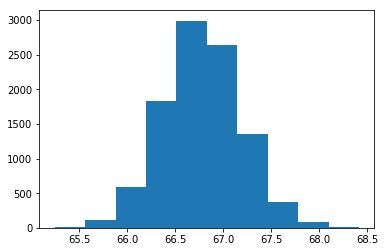

In [20]:
import matplotlib.pyplot as plt
plt.hist(mean_height)

In [21]:
lower_boundary = np.percentile(mean_height,2.5)
upper_boundary = np.percentile(mean_height,97.5)
lower_boundary,upper_boundary

(65.9929132815752, 67.58402738281573)

5. 你的区间是否记录了人群中不喝咖啡的人的实际平均身高？看一看人口中的平均数和95％置信区间提供的两个界限，然后回答下面的最后一个测试题目。

+ 样本中不喝咖啡的平均身高，落入置信区间中。

In [22]:
# 总体的平均高度
coffee_full.height.mean()

67.59748697307937